In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('/content/wines_SPA_outliers_removed.csv')      #LOADING THE DTASET THAT I PREVIOUSLY CLEANED AND REMOVED OUTLIERS

In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Pago de Carraovejas,El Anejon,2016,4.8,454.0,Espana,Ribera del Duero,105.15000,Ribera Del Duero Red,5.0,3.0
1,Pago de Carraovejas,Cuesta de Las Liebres,2015,4.8,372.0,Espana,Ribera del Duero,166.18000,Ribera Del Duero Red,5.0,3.0
2,Bodegas El Nido,El Nido,2018,4.8,217.0,Espana,Jumilla,195.62738,Red,4.0,3.0
3,La Rioja Alta,Gran Reserva 890,1985,4.8,26.0,Espana,Rioja,215.34000,Rioja Red,4.0,3.0
4,Pago de Carraovejas,Cuesta de Las Liebres,2014,4.7,685.0,Espana,Ribera del Duero,113.18000,Ribera Del Duero Red,5.0,3.0


In [10]:
# STANDARDISATION USING Z-SCORE SCALING
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler_standard.fit_transform(df[num_cols])

# DISPLAY
df_standardized.head()
# ENSURES THAT DATA HAS MEAN OF 0 AND STD 0F 1

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Pago de Carraovejas,El Anejon,2016,3.517571,0.802642,Espana,Ribera del Duero,0.841107,Ribera Del Duero Red,1.397288,0.0
1,Pago de Carraovejas,Cuesta de Las Liebres,2015,3.517571,0.496045,Espana,Ribera del Duero,2.099802,Ribera Del Duero Red,1.397288,0.0
2,Bodegas El Nido,El Nido,2018,3.517571,-0.083499,Espana,Jumilla,2.707130,Red,-0.398454,0.0
3,La Rioja Alta,Gran Reserva 890,1985,3.517571,-0.797646,Espana,Rioja,3.113687,Rioja Red,-0.398454,0.0
4,Pago de Carraovejas,Cuesta de Las Liebres,2014,2.683803,1.666348,Espana,Ribera del Duero,1.006719,Ribera Del Duero Red,1.397288,0.0


In [12]:
# NORMALISATION (MIN-MAX TECHNIQUE)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = scaler_minmax.fit_transform(df[num_cols])

# DISPALY
df_normalized.head()
# ENSURES ALL VALUES TO BE IN BETWEEN [0,1]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Pago de Carraovejas,El Anejon,2016,1.000000,0.382012,Espana,Ribera del Duero,0.432415,Ribera Del Duero Red,1.0,0.0
1,Pago de Carraovejas,Cuesta de Las Liebres,2015,1.000000,0.308994,Espana,Ribera del Duero,0.697245,Ribera Del Duero Red,1.0,0.0
2,Bodegas El Nido,El Nido,2018,1.000000,0.170971,Espana,Jumilla,0.825027,Red,0.5,0.0
3,La Rioja Alta,Gran Reserva 890,1985,1.000000,0.000890,Espana,Rioja,0.910566,Rioja Red,0.5,0.0
4,Pago de Carraovejas,Cuesta de Las Liebres,2014,0.833333,0.587711,Espana,Ribera del Duero,0.467260,Ribera Del Duero Red,1.0,0.0


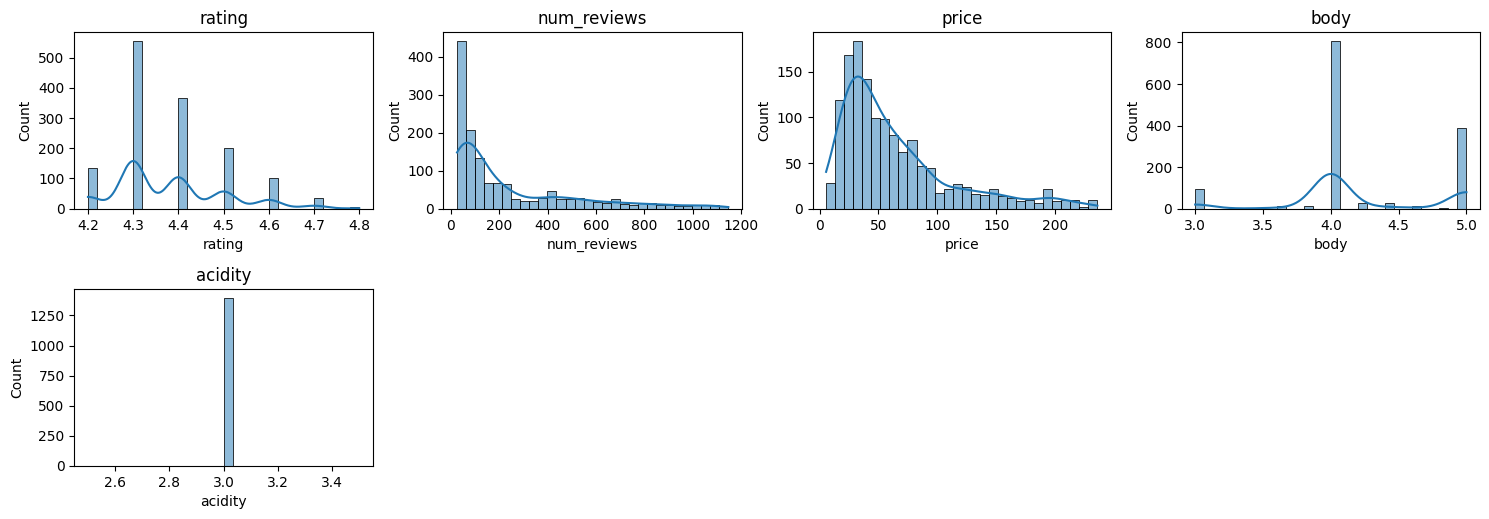

In [8]:
# ANALYSING DATA DISTRIBUTION TO DECIDE WHICH SCALING METHOD TO USE
# IF DATA FOLLOW NORMAL DISTRIBUTION==> NO SKEWNESS WE USE STANDARDISATION
# BUT IF DATA IS SKEWED OR CONTAINS OUTLIERS ==> USE NORMALISATION

# Plot histograms of numerical features
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid based on number of columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [5]:
# TO CHECK DISTRIBUTION OF DATA

In [7]:
# CALCULATING SKEWNESS OF NUMERICAL COLUMNS
skewness = df[num_cols].skew().sort_values(ascending=False)
print(skewness)
#0=>NORMALLY DISTRIBUTED

num_reviews    1.533283
price          1.482199
rating         0.780783
acidity        0.000000
body          -0.029833
dtype: float64


In [13]:
# NOW LET'S COMPARE

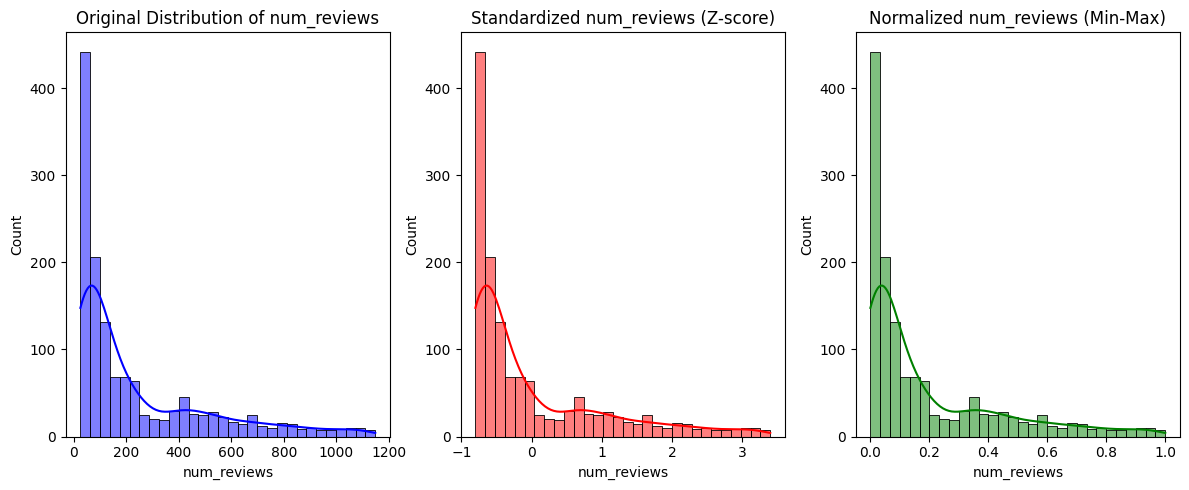

In [14]:
most_skewed_feature = skewness.idxmax()  #
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 3, 1)
sns.histplot(df[most_skewed_feature], bins=30, kde=True, color='blue')
plt.title(f'Original Distribution of {most_skewed_feature}')

# Standardized
plt.subplot(1, 3, 2)
sns.histplot(df_standardized[most_skewed_feature], bins=30, kde=True, color='red')
plt.title(f'Standardized {most_skewed_feature} (Z-score)')

# Normalized
plt.subplot(1, 3, 3)
sns.histplot(df_normalized[most_skewed_feature], bins=30, kde=True, color='green')
plt.title(f'Normalized {most_skewed_feature} (Min-Max)')

plt.tight_layout()
plt.show()


In [15]:
# HELPS TO  VISUALISE HOW EACH SCALING AFFECTS DATA

In [16]:
# NOW WHICH METHOD IS SUITABLE FOR THIS DATASET??

In [17]:
if (abs(skewness) < 1).all():
    print("The dataset is normally distributed.Standardization (Z-score).")
else:
    print("The dataset is highly skewed.Min-Max Normalization.")


The dataset is highly skewed.Min-Max Normalization.


In [19]:
# ==> MIX-MAX NORMALISATION WON HERE!

In [21]:
df_normalized.to_csv('/content/wines_SPA_normalized.csv', index=False)
print("Normalized dataset saved successfully!")


Normalized dataset saved successfully!


In [22]:
df_standardized.to_csv('/content/wines_SPA_standardized.csv', index=False)
print("Standardized dataset saved successfully!")


Standardized dataset saved successfully!


In [23]:
df_normalized.to_csv('/content/final_scaled_df.csv', index=False)